# Project Description

In this project, we will implement a linear perceptron classifier from scratch that classifies two random classes. This project aims to become familiar with fundamental neural network learning concepts, so we will keep it easy to understand.



Perceptron classifier can classify two classes that can be divided by a line. in each epoch weights updated by the following equation:

![LPC_L.png](doc/LPC_L.png)


In [12]:
# import libraries

# for calculataion
import numpy as np

# for visualization
import matplotlib.pyplot as plt

In [13]:
# generate dataset

# set random seed to the generate same result each run
np.random.seed(50)

# function to generate random data points
def generate_data(sample_center: float, sample_mean: float = 0, sample_sd: float = 1, size: int = 100) -> np.ndarray:
    data_class = sample_center + 0.5 * np.random.normal(sample_mean,sample_sd,(size,2))
    return data_class

# generate two sets of data
data_class_x1 = generate_data(sample_center=1)
data_class_x2 = generate_data(sample_center=-1)



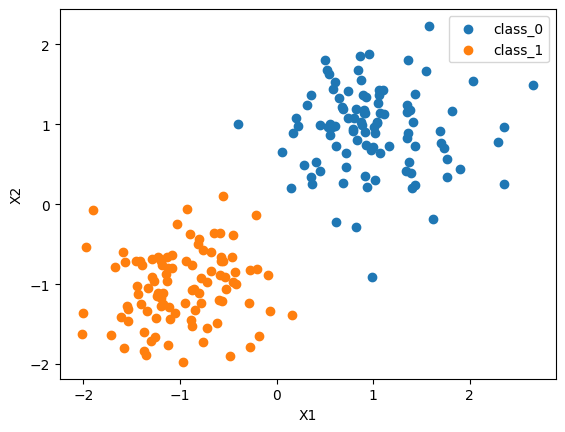

In [14]:
# visualize data points

def plot_classifier_line(weights: np.ndarray, bias: np.ndarray, starting_point:float = -3, ending_point:float = 3, show: bool = True) -> None:
    x = np.linspace(starting_point,ending_point,50)
    w0 = weights[0][0]
    w1 = weights[1][0]
    interpolate1 = (w0 / (-1*w1))
    b = bias[0]/(-1*w1)
    interpolateY = interpolate1*x + b
    plt.plot(x,interpolateY)

    if show:
        plt.show()

def plot_data(data_classes: list[np.ndarray], show: bool = True) -> None:
    for idx, data_class in enumerate(data_classes):
        plt.scatter(data_class[:, 0], data_class[:, 1], marker='o', label = f'class_{idx}')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
    
    if show:
        plt.show()

plot_data([data_class_x1, data_class_x2])

In [15]:
class LinearPerceptronClassifier:

    # for linear perceptron classifier, we have to define Threshold and Learning_rate. Threshold will be used in the activation function and Learning_rate will be used to update weights. 
    def __init__(self, threshold: float = 0.5, learning_rate: float = 0.2) -> None:
        # now we need to define weights and bias. weights are coefficients for each data point variable. our data points have two variables or dimensions so we need to create a weight matrix with 2x1 dimension
        #weights = np.array([w11, w12], [w21 ,w22]) and w21 mean weight for eadge from x2 to y1
        self.weights = np.zeros((2,1))
        self.bias = np.zeros((1,))
        self.threshold = threshold
        self.learning_rate = learning_rate


    # this function will generate a line to classify data points. so it returns a weight matrix
    def fit(self, dataset_class_1: np.ndarray, dataset_class_2: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
        # in this method, we update weights by each data point. in other words, like Stochastic Gradient Descent, this computes the gradient for one training sample and updates the parameter immediately. 
        epoch = 0
        end = False
        while not end:
            epoch = epoch + 1
            end = True
            #for class 1
            target_y = 1
            for data in dataset_class_1:
                neuron_z = np.matmul(data, self.weights) + self.bias
                neuron_h = self.activation_func(neuron_z)
                error = neuron_h - target_y
                if error != 0:
                    #update weigths
                    end = False
                    self.update_weights(data, target_y)
            #for class 2
            target_y = -1
            for data in dataset_class_2:
                neuron_z = np.matmul(data, self.weights) + self.bias
                neuron_h = self.activation_func(neuron_z)
                error = neuron_h - target_y
                if error != 0:
                    #update weigths
                    end = False
                    self.update_weights(data, target_y)

        print(f"Model is trained in {epoch} epochs")

        return self.weights, self.bias

    
        
    # the net value is the computed value of the neurons  in the NN. and the output of the activation_func will be passed to the next layer.
    def activation_func(self, net: float) -> int:
        if net > self.threshold:
            return 1
        elif net < -1 * self.threshold:
            return -1
        else:
            return 0
        
    # in perceptron NN, we update each weight
    def update_weights(self, data_point: np.ndarray, target_label: int)-> None:
        weight_change = np.array([[self.learning_rate * data_point[0] * target_label], 
                        [self.learning_rate * data_point[1] * target_label]])
        weight_change = (self.learning_rate * data_point * target_label).reshape((2,1))
        
        self.weights = self.weights + weight_change
        self.bias + self.learning_rate * target_label
        return [self.weights, self.bias]



In [16]:
LPC =  LinearPerceptronClassifier()
weights , bias = LPC.fit(dataset_class_1=data_class_x1, dataset_class_2=data_class_x2)

Model is trained in 8 epochs


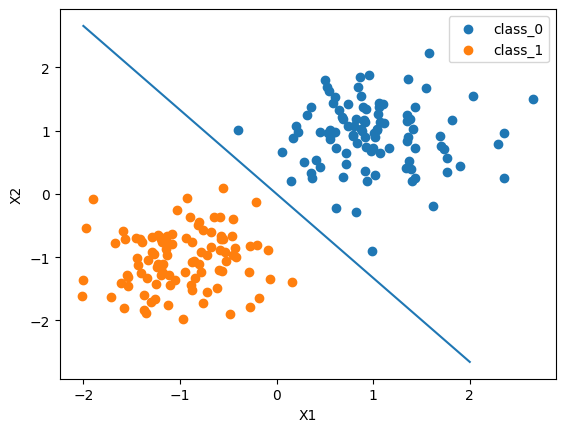

In [19]:
# not we draw data points with the fitted line
plt.cla()
plot_classifier_line(weights, bias, show=False, starting_point=-2, ending_point=2)
plot_data([data_class_x1, data_class_x2], show=False)
plt.show()
